# Metis Introduction to Data Science Course Project
## Felipe Rios Ribeiro

### What is the question you hope to answer?

I selected a challenge from Kaggle named "House Prices - Advanced Regression Techniques", available at https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview.

#### How might we predict house prices using key data and features from houses such as area, age, location, style, condition, etc.

### What data are you planning to use to answer that question?

The available data for this challenge can be found here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

1. Train.csv 

2. Test.csv

### Steps

* Import data and libraries
* Understand the dataset
* Cleaning
* Compare the different regression models and compare them using the RMSE
* Check the RMSE as a % of the Sale Price value


### <span style='background :yellow' > Import data and libraries

In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import Lasso, Ridge, ElasticNet

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#Train data 
fullData = pd.read_csv("/Users/feliperiosribeiro/METIS_project_Felipe/data/train.csv")

### <span style='background :yellow' > Understand the dataset

#### Train data

In [2]:
fullData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* Train has 81 columns, including Sale Price, and LOTS of null values

In [4]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### <span style='background :yellow' > Cleaning 

In [5]:
# fix the columns with non numerical values

# field MSSubClass doesn't have missing values but is not in the right format
# it's the type of dwelling, so that shouldn't be an integer

fullData['MSSubClass'] = fullData['MSSubClass'].astype(str)

# columns where the missing value actually means something, so I'll fill it with "None" 
# these fields are already an object so no need to change format

fullData['Alley'] = fullData['Alley'].fillna("None")
fullData['BsmtQual'] = fullData['BsmtQual'].fillna("None")
fullData['BsmtCond'] = fullData['BsmtCond'].fillna("None")
fullData['BsmtExposure'] = fullData['BsmtExposure'].fillna("None")
fullData['BsmtFinType1'] = fullData['BsmtFinType1'].fillna("None")
fullData['BsmtFinType2'] = fullData['BsmtFinType2'].fillna("None")
fullData['FireplaceQu'] = fullData['FireplaceQu'].fillna("None")
fullData['GarageType'] = fullData['GarageType'].fillna("None")
fullData['GarageFinish'] = fullData['GarageFinish'].fillna("None")
fullData['GarageQual'] = fullData['GarageQual'].fillna("None")
fullData['GarageType'] = fullData['GarageType'].fillna("None")
fullData['GarageCond'] = fullData['GarageCond'].fillna("None")
fullData['PoolQC'] = fullData['PoolQC'].fillna("None")
fullData['Fence'] = fullData['Fence'].fillna("None")
fullData['MiscFeature'] = fullData['MiscFeature'].fillna("None")

# columns that are not numerical and have missing values, so I'll fill it with the mode 
# these fields are already an object so no need to change format

fullData['MSZoning'] = fullData['MSZoning'].fillna(fullData['MSZoning'].mode()[0])
fullData['Utilities'] = fullData['Utilities'].fillna(fullData['Utilities'].mode()[0])
fullData['Exterior1st'] = fullData['Exterior1st'].fillna(fullData['Exterior1st'].mode()[0])
fullData['Exterior2nd'] = fullData['Exterior2nd'].fillna(fullData['Exterior2nd'].mode()[0])
fullData['Functional'] = fullData['Functional'].fillna(fullData['Functional'].mode()[0])
fullData['MasVnrType'] = fullData['MasVnrType'].fillna(fullData['MasVnrType'].mode()[0])
fullData['Electrical'] = fullData['Electrical'].fillna(fullData['Electrical'].mode()[0])
fullData['KitchenQual'] = fullData['KitchenQual'].fillna(fullData['KitchenQual'].mode()[0])
fullData['SaleType'] = fullData['SaleType'].fillna(fullData['SaleType'].mode()[0])


In [6]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now I'm missing the following:
* LotFrontage
* MasVnrArea
* BsmtFinSF1
* BsmtFinSF2
* TotalBsmtSF
* BsmtFullBath
* BsmtHalfBath
* Functional
* GarageYrBlt
* GarageCars
* GarageArea

In [7]:
# fill numeric fields with median

fullData['LotFrontage'] = fullData['LotFrontage'].fillna(fullData['LotFrontage'].mean())
fullData['MasVnrArea'] = fullData['MasVnrArea'].fillna(fullData['MasVnrArea'].mean())
fullData['BsmtFinSF1'] = fullData['BsmtFinSF1'].fillna(fullData['BsmtFinSF1'].mean())
fullData['BsmtFinSF2'] = fullData['BsmtFinSF2'].fillna(fullData['BsmtFinSF2'].mean())
fullData['BsmtFullBath'] = fullData['BsmtFullBath'].fillna(fullData['BsmtFullBath'].mean())
fullData['BsmtHalfBath'] = fullData['BsmtHalfBath'].fillna(fullData['BsmtHalfBath'].mean())
fullData['GarageYrBlt'] = fullData['GarageYrBlt'].fillna(fullData['GarageYrBlt'].mean())
fullData['GarageCars'] = fullData['GarageCars'].fillna(fullData['GarageCars'].mean())
fullData['GarageArea'] = fullData['GarageArea'].fillna(fullData['GarageArea'].mean())


In [8]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### <span style='background :yellow' > Handling Categorical Features

In [9]:
# Make a copy of the dataset in case the encoding goes wrong

fullData2 = fullData.copy()

In [10]:
fullData2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [80]:
#will encode all variables that are not integer or float64

fullData2 = pd.get_dummies(fullData2)
fullData2.shape

(1460, 318)

In [81]:
fullData2.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


### <span style='background :yellow' > Understand Sale Price (target variable)

In [15]:
fullData2.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

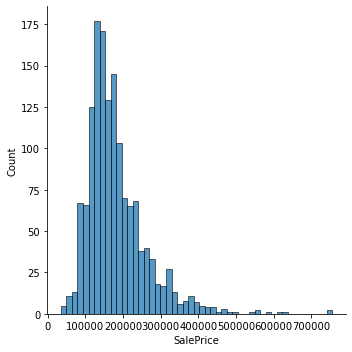

In [77]:
#histogram
sns.displot(fullData2['SalePrice']);

* Average sale price is almost 181k, with a considerable St. Deviation of almost 80k
* Price is positively skewed, and is not aligned to normal distribution ("bell-shaped" curve)

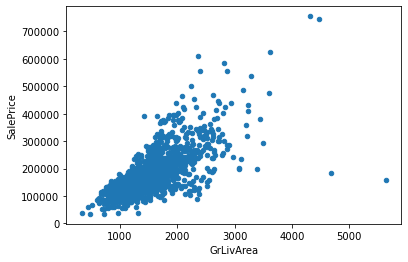

In [95]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([fullData2['SalePrice'], fullData2[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

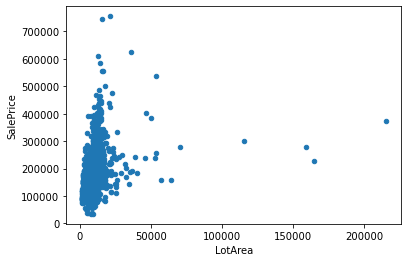

In [93]:
#scatter plot LotArea/saleprice
var = 'LotArea'
data = pd.concat([fullData2['SalePrice'], fullData2[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

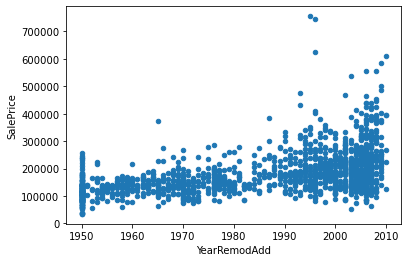

In [92]:
#scatter plot YearRemodAdd/saleprice
var = 'YearRemodAdd'
data = pd.concat([fullData2['SalePrice'], fullData2[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

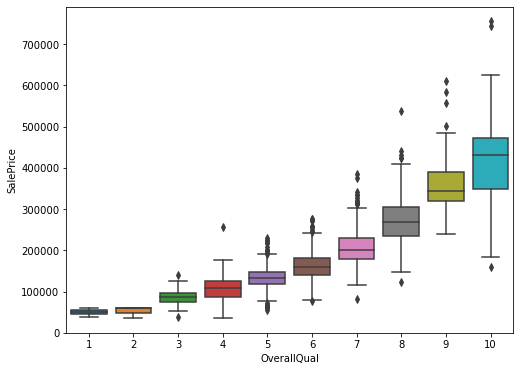

In [97]:
#non numerical variables
var = 'OverallQual'
data = pd.concat([fullData2['SalePrice'], fullData2[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0);

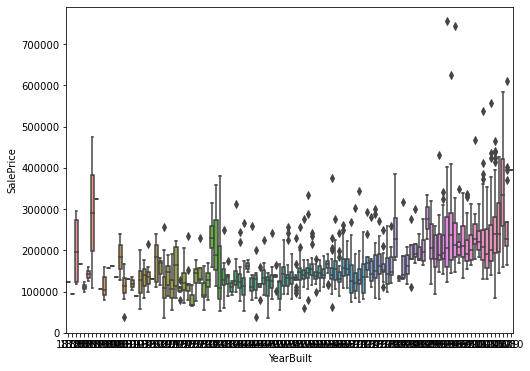

In [98]:
#non numerical variables
var = 'YearBuilt'
data = pd.concat([fullData2['SalePrice'], fullData2[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0);

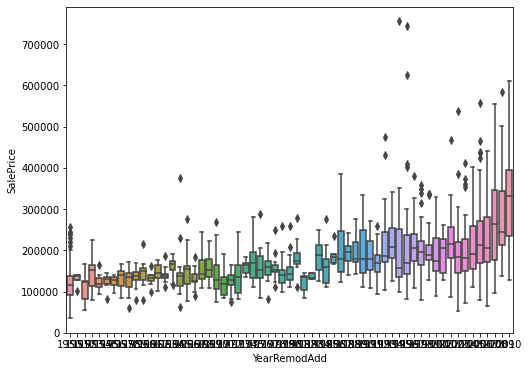

In [99]:
#non numerical variables
var = 'YearRemodAdd'
data = pd.concat([fullData2['SalePrice'], fullData2[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0);

In [100]:
#store these in a variable in case I need later
priceColumn = fullData2['SalePrice']
origId = fullData2['Id']

### <span style='background :yellow' > Multi Linear Regression

In [18]:
fullData3 = fullData2.copy()
fullData3 = fullData3.drop('Id', axis = 1)

In [19]:
fullData3.shape

(1460, 317)

In [20]:
#X_mult
X = fullData3.drop('SalePrice', axis=1)

#target
y = fullData3.SalePrice

In [21]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
print("training data size:",X_train.shape)
print("testing data size:",X_test.shape)

training data size: (1022, 316)
testing data size: (438, 316)


### <span style='background :yellow' > Multi Linear Regression

In [22]:
#instantiate
ml = LinearRegression()

#fit
ml.fit(X_train, y_train)

#predict
prediction_ml = ml.predict(X_test)

#score
ml_RMSE = np.sqrt(metrics.mean_squared_error(y_test, prediction_ml))
print("Multi Linear Reg RMSE:",ml_RMSE)

Multi Linear Reg RMSE: 81822.2598135216


### <span style='background :yellow' > KNN

In [23]:
# Instantiate!
knn_reg = KNeighborsRegressor()

# Fit!
knn_reg.fit(X_train, y_train)

# Predict!
predictions_knn = knn_reg.predict(X_test)

# Score!
#accuracy_knn = metrics.accuracy_score(y_test, predictions_knn)
#print(f"The accuracy of the ?? model was {accuracy_knn}")
knn_RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions_knn))
print("KNN RMSE:",knn_RMSE)

KNN RMSE: 41089.70316681635


### <span style='background :yellow' > Decision Tree

In [40]:
decision_tree = DecisionTreeRegressor(max_depth=3, random_state=123)
decision_tree.fit(X_train,y_train)
dtree_rmse = np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test)))
print("Decision Tree RMSE:", dtree_rmse)

Decision Tree RMSE: 40126.105472414776


### <span style='background :yellow' > Random Forest of 500 trees

In [48]:
# Instantiate!
rf = RandomForestRegressor(n_estimators=500, bootstrap=True, oob_score=True, random_state=123)

# Fit!
rf.fit(X_train, y_train)

# Predict!
rf_predictions = rf.predict(X_test)

rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
print("Random Forest RMSE:", rf_RMSE)

Random Forest RMSE: 24742.688132025803


### <span style='background :yellow' > Bag of 500 trees

In [42]:
#Bag of 500 trees
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
bagreg.fit(X_train, y_train)
y_pred_bag = bagreg.predict(X_test)

bag_rmse = np.sqrt(mean_squared_error(y_test,y_pred_bag))
print("Bag RMSE:", bag_rmse)

Bag RMSE: 24730.932525895383


### <span style='background :yellow' > Cross validation

In [27]:
lr = LinearRegression()
mean_squared_errors = np.abs(cross_val_score(lr,X,y,cv=50,scoring='neg_mean_squared_error'))
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("50-fold mean RMSE: ", np.mean(root_mean_squared_errors))

50-fold mean RMSE:  15860273.329625035


### <span style='background :yellow' > Ridge

In [29]:
#Instantiate
ridge = Ridge(alpha=0.1, normalize=True)

#fit
ridge.fit(X_train,y_train)

#predict
ridge_pred = ridge.predict(X_test)

mean = mean_squared_error(y_test, ridge_pred) 
ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_pred))               

print("Ridge RMSE: ",ridge_rmse)

Ridge RMSE:  31024.630688050875


### <span style='background :yellow' > Hyper Paramenter Tuning

In [31]:
rf_grid = RandomForestRegressor()

In [32]:
# Let's set our parameter grid
num_trees_range = range(100, 800, 200)
max_features = ['sqrt', 'log2', None]
param_grid = dict(max_features=max_features,
                   n_estimators=num_trees_range)
print(param_grid)

{'max_features': ['sqrt', 'log2', None], 'n_estimators': range(100, 800, 200)}


In [33]:
grid = GridSearchCV(rf_grid,
                     param_grid,
                     cv=10,
                     scoring='neg_root_mean_squared_error',
                     n_jobs=-1,
                     verbose=1) # This will print out as it is training. Remove if annoying.

In [34]:
# We can go back to our original datasets here
grid.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.7min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': range(100, 800, 200)},
             scoring='neg_root_mean_squared_error', verbose=1)

In [35]:
# What was best model?
print("Best score:",grid.best_score_)
print("Best params:",grid.best_params_)
print("Best estimator:",grid.best_estimator_)

Best score: -30128.4839193375
Best params: {'max_features': None, 'n_estimators': 300}
Best estimator: RandomForestRegressor(max_features=None, n_estimators=300)


### <span style='background :yellow' > SUMMARY - RMSE COMPARISON

In [69]:
fullData2.SalePrice.describe().round(decimals=0)

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

In [79]:
d = {'Method': ['ML Regression RMSE', 'KNN RMSE', 'Decision tree RMSE', 'Random Forest RMSE - 500 trees', 'Bag of 500 trees RMSE', 'Ridge RMSE'], 
                 'Score': [ml_RMSE, knn_RMSE, dtree_rmse, rf_RMSE, bag_rmse, ridge_rmse]}

df = pd.DataFrame(data=d).round(decimals=2)

df['% of Sale Price'] = ((df['Score'] / priceColumn.mean())*100).round(decimals=2)

df.sort_values(by=['Score'])

,Method,Score,% of Sale Price
4,Bag of 500 trees RMSE,24730.93,13.67
3,Random Forest RMSE - 500 trees,24742.69,13.68
5,Ridge RMSE,31024.63,17.15
2,Decision tree RMSE,40126.11,22.18
1,KNN RMSE,41089.70,22.71
0,ML Regression RMSE,81822.26,45.23
